In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

In [110]:
#read data from csv file
df_sales_info = pd.read_csv('sales_data.csv')

In [111]:
#check data
df_sales_info.head()

,date,sales
0,1974-01-01,62.9796
1,1974-02-01,75.3447
2,1974-03-01,84.2683
3,1974-04-01,84.5883
4,1974-05-01,90.5395


In [112]:
df_sales_info.tail()

,date,sales
548,2019-09-01,100.1741
549,2019-10-01,90.1684
550,2019-11-01,79.7223
551,2019-12-01,75.7094
552,2020-01-01,83.6290


In [113]:
#date column as datetime not string
df_sales_info['date'] = pd.to_datetime(df_sales_info.date)

In [114]:
#set date as index
df_sales_info.set_index('date', inplace=True)

In [115]:
#use data from this date
start_date = pd.to_datetime('2009-01-01')
df_sales_info = df_sales_info[start_date:]

In [116]:
#view data
df_sales_info.head()

,sales
date,
2009-01-01,94.1914
2009-02-01,115.2161
2009-03-01,129.6325
2009-04-01,133.0755
2009-05-01,137.9925


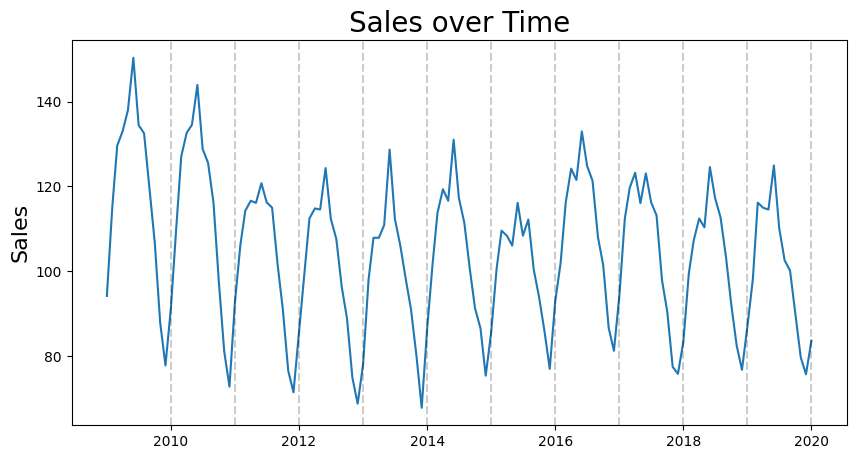

In [117]:
#plot data
plt.figure(figsize=(10,5))
plt.plot(df_sales_info.sales)
plt.title('Sales over Time', fontsize=20)
plt.ylabel('Sales', fontsize=16)
#vertical line in x axis
for year in range(2010,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

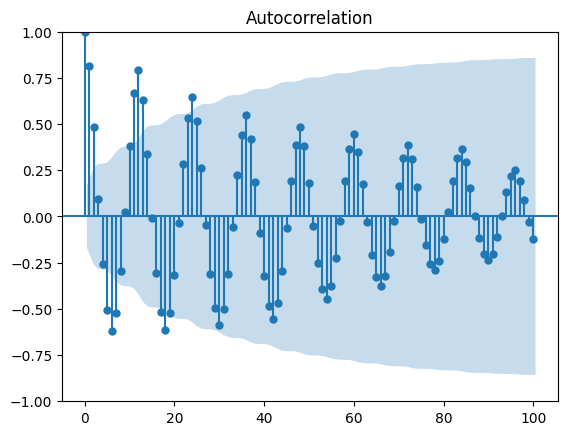

In [118]:
#plot AutoCorrelation
#decaying ACF means it is a AR process
acf_plot = plot_acf(df_sales_info.sales, lags=100)

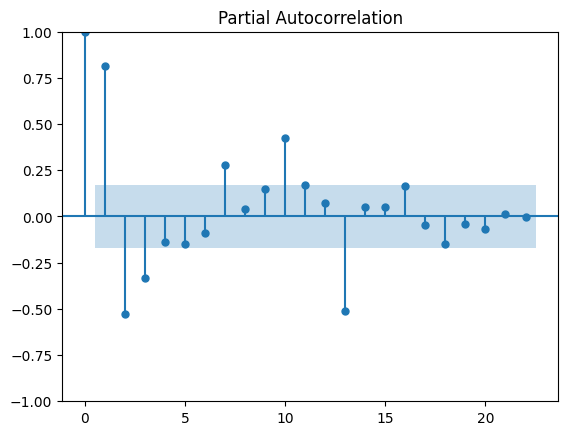

In [119]:
pacf_plot = plot_pacf(df_sales_info.sales, method='ywm')

In [120]:
#PACF significant lags are 1,2,3,10,13

In [121]:
#split data to training and test set
training_end = datetime(2018,12,1)
test_end = datetime(2019,12,1)
training_data = df_sales_info[:training_end]
test_data = df_sales_info[training_end:test_end]

In [122]:
training_data.size

120

In [123]:
test_data.size

13

In [124]:
#find p,d and q values. sometimes it doesn't' work well. 
arima_model =  auto_arima(training_data, 
                          trace = True,
                          supress_warnings=True
                          )

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=847.975, Time=0.62 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1038.169, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=907.645, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=945.409, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1464.036, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=862.705, Time=0.33 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=848.830, Time=0.52 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=847.825, Time=0.68 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=848.275, Time=0.81 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=855.005, Time=0.90 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=857.931, Time=0.82 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=850.280, Time=0.86 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=848.447, Time=0.99 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Ti

In [125]:
model = ARIMA(training_data, order=(3,0,2))

C:\Users\91984\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\91984\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\91984\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [126]:
model_fit = model.fit()

C:\Users\91984\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\91984\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [127]:
forecast = model_fit.forecast(steps=12)

Text(0, 0.5, 'sales')

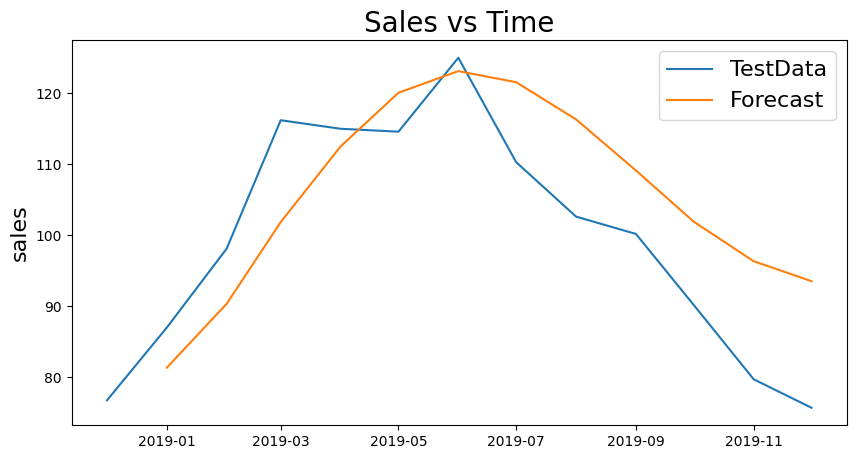

In [128]:
plt.figure(figsize=(10,5))

plt.plot(test_data)
plt.plot(forecast)
plt.legend(('TestData', 'Forecast'), fontsize=16)
plt.title('Sales vs Time', fontsize=20)
plt.ylabel('sales', fontsize=16)

In [129]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  120
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -418.081
Date:                Thu, 13 Oct 2022   AIC                            850.162
Time:                        14:05:57   BIC                            869.674
Sample:                    01-01-2009   HQIC                           858.086
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.9999      1.716     61.202      0.000     101.637     108.362
ar.L1          1.1782      0.860      1.370      0.171      -0.507       2.864
ar.L2         -0.1198      1.407     -0.085      0.9

In [130]:
#mean squared error. Best score is 1.0
from sklearn.metrics import r2_score
r2_score(test_data[:12], forecast)

0.817758816766422